In [17]:
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## I have created my own environmental variable for this project. The assessor can skip this step. 

In [18]:
os.getenv("PUIDATA")

'/nfshome/mp4515/PUIdata'

## Downloaded and unziped the zoning shapefile from Sacramento open data portal

In [3]:
url = "https://opendata.arcgis.com/datasets/13a456d86b0d47459a61e2dacfc8f609_0.zip"
urllib.request.urlretrieve(url, "file_sac.gz")

('file_sac.gz', <http.client.HTTPMessage at 0x7fc13a7a8198>)

In [ ]:
!mv file_sac.gz $PUIDATA

In [ ]:
!cd $PUIDATA;unzip file_sac.gz

Archive:  file_sac.gz
replace Zoning.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [19]:
sac_file = os.environ["PUIDATA"] + "/Zoning.shp"
#puma_file = "C:/Users/student/PythonNotebooks/code/geo_export_dfaff949-a93a-4900-b079-b43a117f9869.shp"
sacshp = gpd.GeoDataFrame.from_file(sac_file)

In [20]:
sacshp.head()

,OBJECTID,PUDNAME,SPDNAME,TYPE,BASE_ZONE,OVERLAY,PROJ_NUMB,ORDINANCE,ORD_DATE,CHNG_DATE,ZONE,Shape__Are,Shape__Len,geometry
0,3001,None,None,R,R-1A,None,None,None,None,None,R-1A,8.933173e-08,0.001210,"POLYGON ((-121.543923137314 38.5097458280559, ..."
1,3002,None,None,R,R-1A,None,None,None,None,None,R-1A,8.943649e-08,0.001221,"POLYGON ((-121.540745235065 38.4865572052093, ..."
2,3003,None,None,R,R-1A,None,None,None,None,None,R-1A,8.950787e-08,0.001196,"POLYGON ((-121.428804142728 38.5296475775529, ..."
3,3004,None,None,R,R-1A,None,None,None,None,None,R-1A,8.967639e-08,0.001199,"POLYGON ((-121.52682585246 38.5023787956723, -..."
4,3005,None,None,R,R-1A,None,None,None,None,None,R-1A,8.987810e-08,0.001187,"POLYGON ((-121.551036172044 38.4928759148223, ..."


In [21]:
sacshp.crs

{'init': 'epsg:4326'}

## Plot of the Sacramento file in order to create sort of a basemap

In [67]:
#f, ax = plt.subplots(1,figsize=(10, 10))
#ax = sacshp.plot(ax=ax,color="orange",edgecolor="blue",linewidth=0.3)
#ax.set_title('Contour Plot of Sac shapefile')
#ax.set_xlabel('Lon')
#ax.set_ylabel('Lat')
#plt.show()

In [23]:
sacshp.columns

Index(['OBJECTID', 'PUDNAME', 'SPDNAME', 'TYPE', 'BASE_ZONE', 'OVERLAY',
       'PROJ_NUMB', 'ORDINANCE', 'ORD_DATE', 'CHNG_DATE', 'ZONE', 'Shape__Are',
       'Shape__Len', 'geometry'],
      dtype='object')

## An example to show data munging/wrangling

In [24]:
sacshp.drop([x for x in sacshp.columns if x not in ['TYPE','OVERLAY','ZONE','Shape__Are','geometry']],inplace=True,axis=1)
sacshp.columns

Index(['TYPE', 'OVERLAY', 'ZONE', 'Shape__Are', 'geometry'], dtype='object')

In [25]:
typegroup = sacshp.groupby(['TYPE']).count().reset_index()
typegroup

,TYPE,OVERLAY,ZONE,Shape__Are,geometry
0,C,1442,1989,1989,1989
1,H,2,2,2,2
2,I,217,350,350,350
3,M,0,1,1,1
4,O,208,398,398,398
5,R,2936,7770,7770,7770


In [26]:
zonegroup = sacshp.groupby(['ZONE']).count().reset_index()
zonegroup.head()

,ZONE,TYPE,OVERLAY,Shape__Are,geometry
0,A,96,0,96,96
1,A-EA-2,1,1,1,1
2,A-EA-3,3,3,3,3
3,A-OS,27,0,27,27
4,A-OS-F,1,1,1,1


In [ ]:
#R-4A - Multi-Family (110) R-5 - Multi-Family (174) RCMU - Residential/Commercial Mixed Use RMU - Residential Mixed Use RO - Residential-Office RMX
#C-4 - Heavy Commercial EC - Employment Center 

In [27]:
zonegroup.columns

Index(['ZONE', 'TYPE', 'OVERLAY', 'Shape__Are', 'geometry'], dtype='object')

In [28]:
zonegroup[['ZONE']]

,ZONE
0,A
1,A-EA-2
2,A-EA-3
3,A-OS
4,A-OS-F
5,A-OS-PC-SPD
6,A-OS-PUD
7,A-OS-PUD-SPD
8,A-OS-SPD
9,A-OS-SWR-PUD


In [ ]:
def ExtractPoints(kml):
  rv = {}
  ns = "{http://earth.google.com/kml/2.2}"
  tree = ElementTree()
  tree.parse(kml)
  for placemark in tree.findall(".//" + ns + "Placemark"):
    name = placemark.findtext(ns + "name")
    print("Found %s") % name
    coordinates_text = placemark.findtext(ns + "LineString/" + ns + "coordinates")
    coordinates = []
    for point_text in coordinates_text.split():
      floats = point_text.split(",")
      coordinates.append((float(floats[0]), float(floats[1])))
    if coordinates[0] == coordinates[-1]:
      rv[name] = Polygon(coordinates)
    else:
      rv[name] = LineString(coordinates)
  return 

## Downloaded address zip file from open data to join the file to addresses

In [ ]:
!cd $PUIDATA;unzip Address.zip

In [29]:
address_file = os.environ["PUIDATA"] + "/Address.shp"
#puma_file = "C:/Users/student/PythonNotebooks/code/geo_export_dfaff949-a93a-4900-b079-b43a117f9869.shp"
addshp = gpd.GeoDataFrame.from_file(address_file)

In [30]:
addshp.head()

,Address_ID,Jurisdicti,Address_Nu,Address__1,Prefix_Typ,Pre_Direct,Street_Nam,Street_Suf,Post_Direc,Unit_Indic,...,Full_Stree,Centerline,USPS_Deliv,State_Plan,State_Pl_1,Longitude_,Latitude_Y,Input_Date,Last_Updat,geometry
0,3189,SACRAMENTO,724,None,None,None,12TH,ST,None,None,...,12TH ST,21001,N,6707442.228,1974207.556,-121.490039,38.582068,2005-07-22T00:00:00.000Z,2018-02-28T15:17:18.000Z,POINT (6707442.229925469 1974207.560104564)
1,3190,SACRAMENTO,1115,None,None,None,H,ST,None,None,...,H ST,21109,Y,6707318.857,1974293.547,-121.490469,38.582306,2005-07-22T00:00:00.000Z,2017-03-20T10:11:24.000Z,POINT (6707318.860093474 1974293.55009006)
2,3191,SACRAMENTO,715,None,None,None,11TH,ST,None,APT,...,11TH ST,20947,Y,6707277.309,1974429.224,-121.490611,38.582679,2005-12-19T00:00:00.000Z,2017-03-20T10:11:24.000Z,POINT (6707277.309979722 1974429.220094308)
3,3192,SACRAMENTO,715,None,None,None,11TH,ST,None,APT,...,11TH ST,20947,Y,6707277.309,1974429.224,-121.490611,38.582679,2005-12-19T00:00:00.000Z,2017-03-20T10:11:24.000Z,POINT (6707277.309979722 1974429.220094308)
4,3193,SACRAMENTO,615,None,None,None,11TH,ST,None,APT,...,11TH ST,20814,Y,6707401.436,1974834.440,-121.490169,38.583790,2005-12-19T00:00:00.000Z,2017-03-20T10:11:24.000Z,POINT (6707401.439980805 1974834.440084398)


In [66]:
#f, ax = plt.subplots(1,figsize=(10, 10))
#ax = addshp.plot(ax=ax,color="white",edgecolor="black",linewidth=0.3)
#ax.set_title('Contour Plot of SAC_COUNTY shapefile')
#ax.set_xlabel('Lon')
#ax.set_ylabel('Lat')
#plt.show()

In [39]:
addshp.to_crs(epsg=2263,inplace=True)
sacshp.to_crs(epsg=2263,inplace=True)

## Converted data to_crs (single format) and joined the geodataset to form a plot

In [40]:
link = gpd.sjoin(sacshp,addshp)
#linkpp['puma'] = linkpp.index
link.head()

,TYPE,OVERLAY,ZONE,Shape__Are,geometry,index_right,Address_ID,Jurisdicti,Address_Nu,Address__1,...,Address__2,Full_Stree,Centerline,USPS_Deliv,State_Plan,State_Pl_1,Longitude_,Latitude_Y,Input_Date,Last_Updat
0,R,None,R-1A,8.933173e-08,"POLYGON ((-11973177.71296022 3001554.34253764,...",82812,90296,SACRAMENTO,6452,None,...,"SACRAMENTO, CA 95831-1023",RIVERSIDE BLVD,63967,Y,6692116.387,1947763.731,-121.544116,38.509680,2005-07-22T00:00:00.000Z,2017-03-20T10:11:24.000Z
0,R,None,R-1A,8.933173e-08,"POLYGON ((-11973177.71296022 3001554.34253764,...",82832,90324,SACRAMENTO,6450,None,...,"SACRAMENTO, CA 95831-1023",RIVERSIDE BLVD,63967,Y,6692143.517,1947810.222,-121.544020,38.509808,2005-07-22T00:00:00.000Z,2017-03-20T10:11:24.000Z
1,R,None,R-1A,8.943649e-08,"POLYGON ((-11976763.5929049 2993846.706187433,...",101870,96462,SACRAMENTO,1,None,...,"SACRAMENTO, CA 95831-3768",ROCKY RIVER CT,65566,Y,6693167.439,1939382.418,-121.540591,38.486652,2005-07-22T00:00:00.000Z,2017-03-20T10:11:24.000Z
1,R,None,R-1A,8.943649e-08,"POLYGON ((-11976763.5929049 2993846.706187433,...",101849,96441,SACRAMENTO,552,None,...,"SACRAMENTO, CA 95831-3764",DE MAR DR,65530,Y,6693184.749,1939427.778,-121.540529,38.486776,2005-07-22T00:00:00.000Z,2017-03-20T10:11:24.000Z
2,R,None,R-1A,8.950787e-08,POLYGON ((-11941197.00180454 2990760.831463937...,65444,72650,SACRAMENTO,5060,None,...,"SACRAMENTO, CA 95820-5863",STONER DR,63158,Y,6725121.707,1955246.781,-121.428610,38.529716,2005-07-22T00:00:00.000Z,2017-03-20T10:11:24.000Z


In [48]:
link['Type'] = 0
link['Type'][link['USPS_Deliv']=='Y'] = 1
link.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,TYPE,OVERLAY,ZONE,Shape__Are,geometry,index_right,Address_ID,Jurisdicti,Address_Nu,Address__1,...,Full_Stree,Centerline,USPS_Deliv,State_Plan,State_Pl_1,Longitude_,Latitude_Y,Input_Date,Last_Updat,Type
0,R,None,R-1A,8.933173e-08,"POLYGON ((-11973177.71296022 3001554.34253764,...",82812,90296,SACRAMENTO,6452,None,...,RIVERSIDE BLVD,63967,Y,6692116.387,1947763.731,-121.544116,38.509680,2005-07-22T00:00:00.000Z,2017-03-20T10:11:24.000Z,1
0,R,None,R-1A,8.933173e-08,"POLYGON ((-11973177.71296022 3001554.34253764,...",82832,90324,SACRAMENTO,6450,None,...,RIVERSIDE BLVD,63967,Y,6692143.517,1947810.222,-121.544020,38.509808,2005-07-22T00:00:00.000Z,2017-03-20T10:11:24.000Z,1
1,R,None,R-1A,8.943649e-08,"POLYGON ((-11976763.5929049 2993846.706187433,...",101870,96462,SACRAMENTO,1,None,...,ROCKY RIVER CT,65566,Y,6693167.439,1939382.418,-121.540591,38.486652,2005-07-22T00:00:00.000Z,2017-03-20T10:11:24.000Z,1
1,R,None,R-1A,8.943649e-08,"POLYGON ((-11976763.5929049 2993846.706187433,...",101849,96441,SACRAMENTO,552,None,...,DE MAR DR,65530,Y,6693184.749,1939427.778,-121.540529,38.486776,2005-07-22T00:00:00.000Z,2017-03-20T10:11:24.000Z,1
2,R,None,R-1A,8.950787e-08,POLYGON ((-11941197.00180454 2990760.831463937...,65444,72650,SACRAMENTO,5060,None,...,STONER DR,63158,Y,6725121.707,1955246.781,-121.428610,38.529716,2005-07-22T00:00:00.000Z,2017-03-20T10:11:24.000Z,1


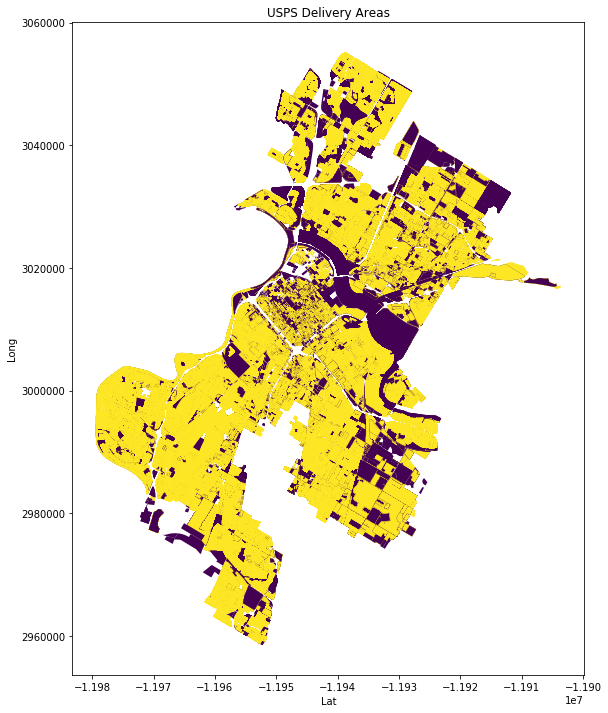

In [65]:
import matplotlib.pyplot as plt
import numpy as np
link.plot(column="Type", figsize=(12,12))
pyplot.title("USPS Delivery Areas")
plt.xlabel('Lat')
plt.ylabel('Long')
fig.savefig('test1.jpg')
#addshp.plot(ax=ax,markersize=10,c=addshp['Address_ID'],cmap="OrRd")
plt.show()

#### All these conditions were researched. All of these conditions are major factors in structural problems during an earthquake. 